In [1]:
## import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#load data
df=pd.read_csv('house_boston.csv')

In [3]:
#view the first five rows of the dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#checking the statistical properties of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
#Getting the column names
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

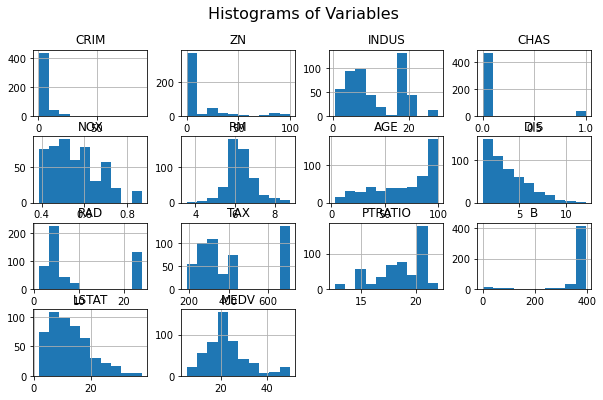

In [8]:
# Plot histograms for all variables in the dataset to visualise the distribution of the variables
df.hist(bins=10, figsize=(10, 6))  
plt.suptitle("Histograms of Variables", fontsize=16)
plt.show()

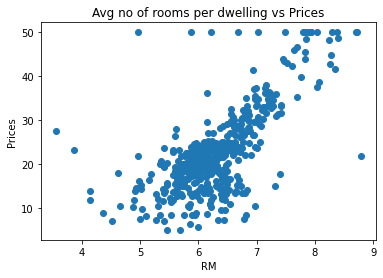

In [9]:
# Visualizing the differences between actual prices and predicted values
plt.scatter("RM", "MEDV", data=df)
plt.xlabel("RM")
plt.ylabel("Prices")
plt.title("Avg no of rooms per dwelling vs Prices")
plt.show()

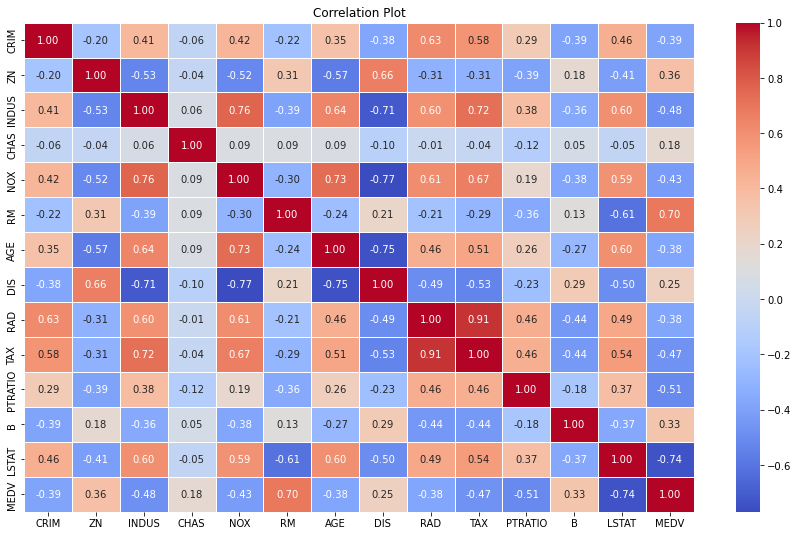

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [11]:
# Adding an intercept column
df['intercept'] = 1

In [12]:
# Define the predictor variables (X) and the target variable (y)
X = df[['intercept','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

# Fit the model
model = sm.OLS(y, X).fit()

In [13]:
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          6.72e-135
Time:                        16:05:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.4595      5.103      7.144      0.0

In [14]:
from sklearn import metrics
# Make predictions using the fitted model
y_pred = model.predict(X)
print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('MSE:',metrics.mean_squared_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y, y_pred)))


MAE: 3.270862810900314
MSE: 21.894831181729202
RMSE: 4.679191295697281


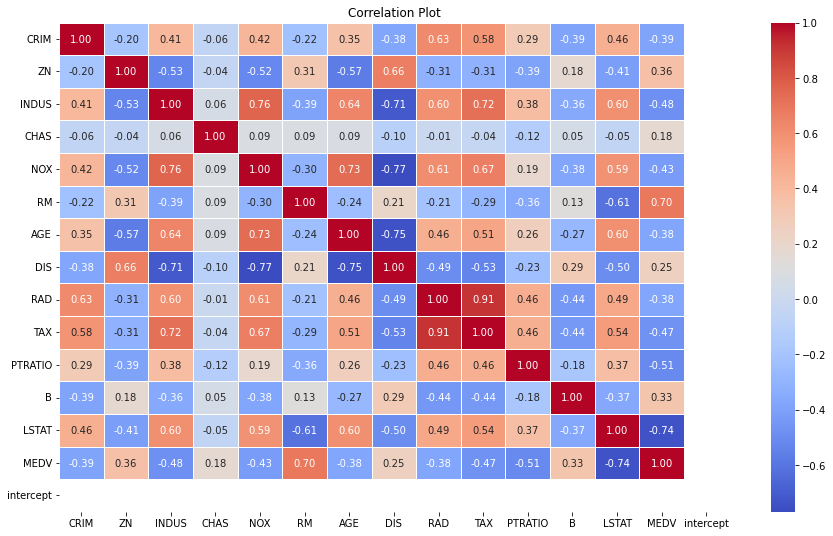

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [16]:
# Calculate VIF for each independent variable to check multicolinearity
X = df[['intercept','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

     Variable         VIF
0   intercept  585.265238
1        CRIM    1.792192
2          ZN    2.298758
3       INDUS    3.991596
4        CHAS    1.073995
5         NOX    4.393720
6          RM    1.933744
7         AGE    3.100826
8         DIS    3.955945
9         RAD    7.484496
10        TAX    9.008554
11    PTRATIO    1.799084
12          B    1.348521
13      LSTAT    2.941491


In [17]:
#calculate 95% confidence interval for the parameter estimates
conf_intervals_95 = model.conf_int(alpha=0.05)

In [18]:
print(conf_intervals_95)

                   0          1
intercept  26.432226  46.486751
CRIM       -0.172584  -0.043438
ZN          0.019449   0.073392
INDUS      -0.100268   0.141385
CHAS        0.993904   4.379563
NOX       -25.271634 -10.261589
RM          2.988727   4.631004
AGE        -0.025262   0.026647
DIS        -1.867455  -1.083679
RAD         0.175692   0.436407
TAX        -0.019723  -0.004946
PTRATIO    -1.209795  -0.695699
B           0.004034   0.014589
LSTAT      -0.624404  -0.425113


In [19]:
#calculate 90% confidence interval for the parameter estimates
conf_intervals_90 = model.conf_int(alpha=0.1)
print(conf_intervals_90)

                   0          1
intercept  28.049210  44.869767
CRIM       -0.162171  -0.053851
ZN          0.023798   0.069043
INDUS      -0.080784   0.121901
CHAS        1.266888   4.106580
NOX       -24.061383 -11.471839
RM          3.121143   4.498588
AGE        -0.021077   0.022461
DIS        -1.804260  -1.146874
RAD         0.196713   0.415386
TAX        -0.018532  -0.006137
PTRATIO    -1.168344  -0.737150
B           0.004885   0.013738
LSTAT      -0.608335  -0.441182


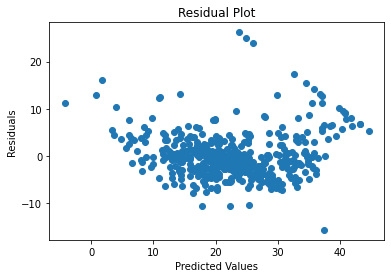

In [20]:
# Calculate the differences (residuals)
Residuals = y-y_pred 

# Create a scatter plot of residuals
plt.scatter(y_pred, Residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()




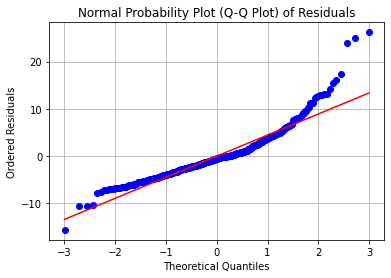

In [21]:

# Generate a Q-Q plot for the residuals
stats.probplot(Residuals, dist='norm', plot=plt)
plt.title('Normal Probability Plot (Q-Q Plot) of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()

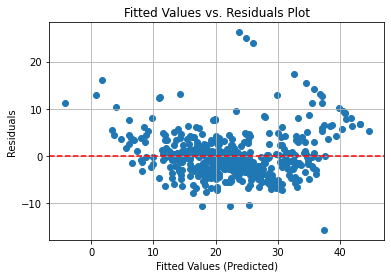

In [22]:
# Plot Fitted Values vs. Residuals
plt.scatter(y_pred, Residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals Plot')
plt.grid(True)
plt.show()

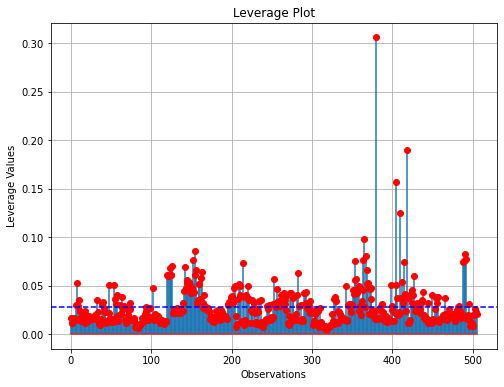

In [23]:
# Get leverage values (hat values) from the model
leverage = model.get_influence().hat_matrix_diag

# Plot Leverage Values
plt.figure(figsize=(8, 6))
plt.stem(leverage, markerfmt='ro')
plt.axhline(y=np.mean(leverage), color='blue', linestyle='--')
plt.xlabel('Observations')
plt.ylabel('Leverage Values')
plt.title('Leverage Plot')
plt.grid(True)
plt.show()

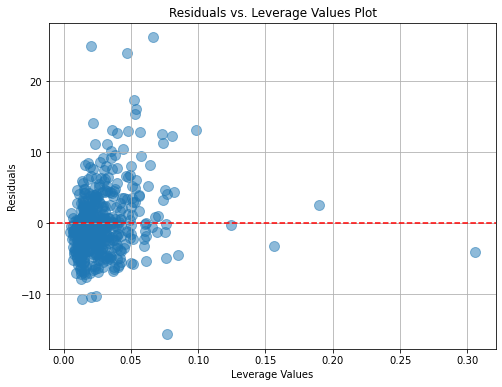

In [24]:
# Get leverage values (hat values) from the model
leverage = model.get_influence().hat_matrix_diag

# Plot Residuals vs. Leverage Values
plt.figure(figsize=(8, 6))
plt.scatter(leverage, Residuals, s=100, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Leverage Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Leverage Values Plot')
plt.grid(True)
plt.show()


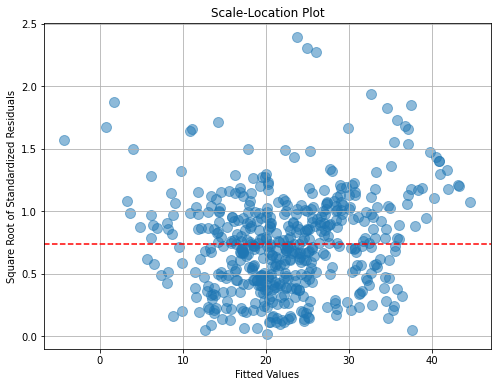

In [25]:
# Get residuals and fitted values from the model
fitted_values = model.fittedvalues

# Calculate the absolute square root of standardized residuals (scale)
scale = np.sqrt(np.abs(model.get_influence().resid_studentized_internal))

# Plot Scale-Location Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, scale, s=100, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.axhline(y=np.mean(scale), color='red', linestyle='--', label='Mean Scale')
plt.title('Scale-Location Plot')
plt.grid(True)
plt.show()

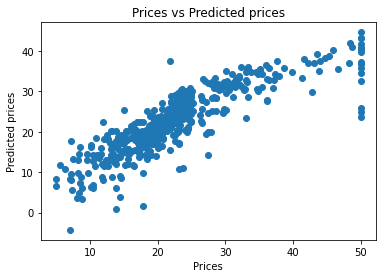

In [26]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

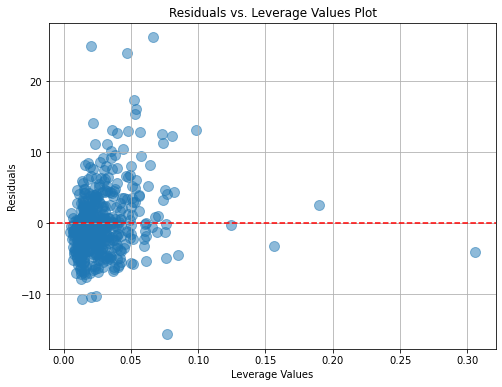

In [27]:
# Get leverage values (hat values) from the model
leverage = model.get_influence().hat_matrix_diag

# Plot Residuals vs. Leverage Values
plt.figure(figsize=(8, 6))
plt.scatter(leverage, Residuals, s=100, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Leverage Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Leverage Values Plot')
plt.grid(True)
plt.show()

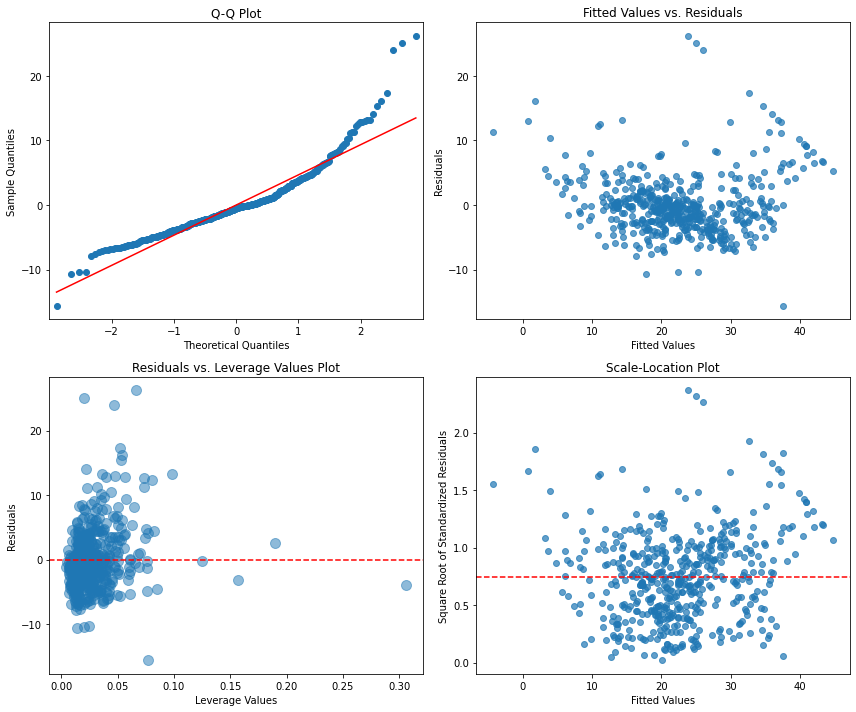

In [28]:
# Get leverage values (hat values) from the model
leverage = model.get_influence().hat_matrix_diag

# Create a 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Q-Q Plot
sm.qqplot(Residuals, line='s', ax=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot')

# Fitted Values vs. Residuals
axes[0, 1].scatter(fitted_values, Residuals, alpha=0.7)
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Fitted Values vs. Residuals')

# Residuals vs. Leverage Values (Your provided plot)
axes[1, 0].scatter(leverage, Residuals, s=100, alpha=0.5)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Leverage Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs. Leverage Values Plot')

# Scale-Location Plot (Square root of standardized residuals vs. Fitted values)
sqrt_standardized_residuals = np.sqrt(np.abs(stats.zscore(Residuals)))
axes[1, 1].scatter(fitted_values, sqrt_standardized_residuals, alpha=0.7)
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Square Root of Standardized Residuals')
axes[1, 1].set_title('Scale-Location Plot')
plt.axhline(y=np.mean(scale), color='red', linestyle='--', label='Mean Scale')
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\feloph\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


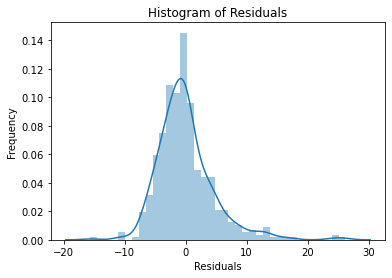

In [29]:
# Checking Normality of errors
sns.distplot(Residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [30]:
#Applying machine learning modeling to the dataset
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
import lightgbm as lgb
#Applying a LIGHTGBM library under Gradient Boosting Decision Tree and defining its hyperparameters
best_params = {
    'num_leaves': 31,
    'max_depth': 5,
    'learning_rate': 0.1,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.5,
    'lambda': 0.1
}


In [32]:
#training and fitting the LIghtGB model
model1 = lgb.LGBMRegressor(objective='quantile', **best_params)
model1.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.1. Current value: lambda_l2=0.1


LGBMRegressor(alpha=0.5, colsample_bytree=0.8, lambda=0.1, max_depth=5,
              objective='quantile', subsample=0.8)

In [33]:
# Making predictions on the test set
y_pred1 = model1.predict(X_test)

# Calculate the R-squared
r_squared = r2_score(y_test, y_pred1)

print(f"R-squared: {r_squared:.3f}")


R-squared: 0.828


In [34]:
# Estimate model evaluagtion matrices
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 2.0685509933680564
MSE: 12.824544367475639
RMSE: 3.5811373008411223


In [35]:
#ESTIMATING UNCERTAINTY USING QUANTILE REGRESSION
#Calculate the quantiles
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
models = []

for quantile in quantiles:
    model1 = lgb.LGBMRegressor(objective='quantile', alpha=quantile, n_estimators=20)
    model1.fit(X_train, y_train)
    models.append(model1)

In [36]:
#calculating lower and upper quantiles
quantile_predictions = np.column_stack([model1.predict(X_test) for model1 in models])
lower_quantile = 0.10  # For example, the 10th percentile
upper_quantile = 0.90  # For example, the 90th percentile

lower_bound = np.percentile(quantile_predictions, lower_quantile*100, axis=1)
upper_bound = np.percentile(quantile_predictions, upper_quantile*100, axis=1)

In [37]:
lower_bound

array([18.74609714, 20.54645469, 16.40110974, 18.80147277, 15.1625836 ,
       18.64510709, 16.58852112, 11.71165947, 17.9097055 , 17.67148061,
       16.96406827, 17.16836143,  7.76012729, 18.60994457, 17.13543657,
       17.48348407, 16.98713079,  7.86773382, 21.10660457, 12.65590247,
       19.17326622, 19.49946602, 12.44275455, 17.18254414, 13.65907355,
       12.71433235, 18.41455806, 12.0951749 , 17.08828022, 17.78679454,
       16.54298273, 19.40831672, 13.66907377, 16.9767063 , 12.26748768,
       14.10986556, 20.98230748, 17.54949765, 17.91799798, 19.22146205,
       14.06258092, 20.24875096, 21.10660457, 17.07582147, 18.80561428,
       12.90276022, 14.33844033, 19.79356951, 17.06761842, 20.11825611,
       18.00313666, 20.61263121, 14.54327477, 19.52446502, 20.99156205,
       18.02442196, 14.88411401, 20.76250823, 18.71969641, 16.02139123,
       18.95343432, 20.90497735, 20.41547601, 15.42928209, 19.59753131,
       13.81958242, 12.10183882, 19.1793215 , 20.50685041, 13.42

In [38]:
upper_bound

array([29.05492231, 38.08441997, 27.07136383, 30.01017213, 26.74774777,
       28.20070767, 27.48356331, 26.58963682, 28.04610104, 27.73028316,
       27.70297773, 27.84243589, 25.42734061, 28.01283772, 28.06375367,
       30.81728835, 27.24763532, 25.42734061, 47.46356367, 25.81875205,
       29.4148445 , 29.10071348, 26.86684772, 29.57100878, 25.7656297 ,
       26.05877533, 28.57056866, 27.20028347, 28.00765998, 27.73028316,
       28.09443073, 28.83248326, 38.98236997, 28.17535014, 26.59207364,
       26.18765482, 40.53714494, 28.19952249, 28.15971412, 29.4129595 ,
       27.5855605 , 31.51821437, 47.82538009, 28.32271654, 29.94399599,
       25.7656297 , 27.07144291, 29.31144574, 27.12158112, 34.3353984 ,
       28.07348502, 38.91530967, 27.11690116, 30.12056134, 48.12034181,
       28.3481107 , 26.47716477, 38.13095903, 28.34358946, 28.01652981,
       29.59875555, 36.86173429, 37.49951492, 28.09877749, 30.95568099,
       27.50134045, 25.44763428, 28.67574264, 36.59336875, 26.86

In [39]:
#Calculate the Prediction Interval coverage Probability(PICP)
def calculate_picp(y, lower_bound, upper_bound):
    num_samples = len(y)
    covered_samples = np.sum((y >= lower_bound) & (y <= upper_bound))
    coverage_probability = covered_samples / num_samples
    return coverage_probability

picp = calculate_picp(y_test, lower_bound, upper_bound)
print(f"Prediction Interval Coverage Probability: {picp:.4f}")

Prediction Interval Coverage Probability: 0.8750


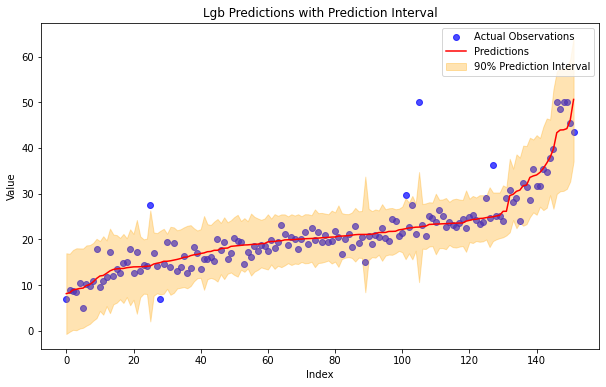

In [40]:
#Visualize the prediction interval
# Sort the data points based on the predictions for plotting purposes
sorted_indices = y_pred1.argsort()
#figure size
plt.figure(figsize=(10, 6))  
# Plot the actual observations
plt.scatter(range(len(y_test)), y_test.iloc[sorted_indices], label='Actual Observations', color='blue', alpha=0.7)

# Plot the predictions
plt.plot(range(len(y_test)), y_pred1[sorted_indices], label='Predictions', color='red')

# Calculate the width of the prediction interval
prediction_interval_width = (upper_bound[sorted_indices] - lower_bound[sorted_indices]) / 2

# Plot the prediction interval as a shaded region
plt.fill_between(
    range(len(y_test)),
    y_pred1[sorted_indices] - prediction_interval_width,
    y_pred1[sorted_indices] + prediction_interval_width,
    color='orange',
    alpha=0.3,
    label='90% Prediction Interval'
)

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Lgb Predictions with Prediction Interval')
plt.legend()

# Show the plot
plt.show()


In [41]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Calculate prediction intervals
alpha = 0.95  # Confidence level
z = 1.96  # Z-score for 95% confidence

# Calculate standard deviation of residuals
residuals = y_test - y_pred1
std_residuals = np.std(residuals)

# Calculate prediction intervals
prediction_intervals = z * std_residuals



# Calculate Mean Prediction Interval Width (MPIW)
mean_interval_width = np.mean(prediction_interval_width)

print(f"Mean Prediction Interval Width (MPIW): {mean_interval_width:.4f}")


Mean Prediction Interval Width (MPIW): 6.7388


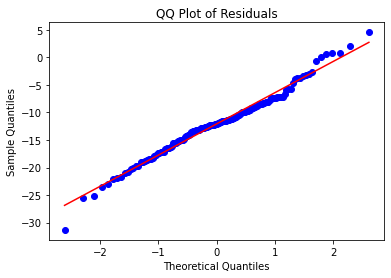

In [42]:
#model evaluation of the Residuals
residuals = y_test - y_pred1

# Create the QQ plot
stats.probplot(residuals, dist="norm", plot=plt)

# Set labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot of Residuals')

# Show the plot
plt.show()

In [43]:
#Training and fitting a RANDOM FOREST REGRESSION MODEL
# Define hyperparameters
n_estimators =20  
max_depth = None  
min_samples_split = 2  
min_samples_leaf = 1  
max_features = 'auto'  
bootstrap = True  
random_state = 42 

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 max_features=max_features,
                                 bootstrap=bootstrap,
                                 random_state=random_state)


rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [44]:
y_pred2 = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 2.1219736842105266
Root Mean Squared Error (RMSE): 3.206834139360566
Mean Squared Error: 10.283785197368422
R-squared: 0.861986874669542


In [45]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]

quantile_predictions2 = [rf_model.predict(X_test) for q in quantiles]
quantile_predictions2 = np.array(quantile_predictions2).T  # Transpose for easier calculations

In [46]:
# Calculate quantile predictions
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
quantile_predictions2 = [rf_model.predict(X_test) for q in quantiles]
quantile_predictions2 = np.array(quantile_predictions2).T

# Calculate lower and upper bands
rf_lower_band = quantile_predictions[:, 0]  # Lower quantile (e.g., 0.05)
rf_upper_band = quantile_predictions[:, -1]  # Upper quantile (e.g., 0.95)

# Calculate PICP as mentioned before
confidence_level = 0.90
rf_lower_quantile = (1.0 - confidence_level) / 2.0
rf_upper_quantile = 1.0 - rf_lower_quantile

in_prediction_interval = np.logical_and(y_test.to_numpy() >= rf_lower_band,
                                       y_test.to_numpy() <=rf_upper_band)

picp = np.mean(in_prediction_interval)
print(f"Prediction Interval Coverage Probability (PICP): {picp}")



Prediction Interval Coverage Probability (PICP): 0.9144736842105263


In [47]:
rf_lower_band

array([17.07846503, 17.07846503, 16.59496679, 17.07846503, 15.01768903,
       17.07846503, 16.62244302,  9.72067981, 16.68512355, 16.78839931,
       16.87352187, 16.9894082 ,  6.60722187, 17.07846503, 16.32652287,
       15.00444926, 16.80869535,  6.60722187, 17.43855427, 11.50227534,
       16.9894082 , 17.07846503, 11.38438941, 14.30958406, 12.16196918,
       11.56624681, 17.07846503, 11.24560211, 16.9894082 , 16.78839931,
       16.15814406, 16.9894082 ,  9.40083072, 15.95320091, 11.28120339,
       13.21289202, 17.01363851, 16.79990995, 17.07846503, 16.9894082 ,
       13.03524643, 17.07846503, 17.43855427, 16.15814406, 17.01363851,
       12.13414369, 13.80147199, 17.07846503, 16.68512355, 17.01363851,
       17.07846503, 17.07846503, 13.91980663, 16.79990995, 17.00645599,
       16.68512355, 14.6689376 , 17.43855427, 17.07846503, 16.01439713,
       16.57415878, 17.2128031 , 17.00645599, 13.77415192, 17.2128031 ,
       12.3553059 , 11.11318621, 17.07846503, 17.43855427, 14.30

In [48]:
rf_upper_band

array([31.63310636, 41.41161641, 32.20981086, 32.53996982, 31.63310636,
       31.63310636, 31.63310636, 32.20981086, 31.63310636, 31.63310636,
       31.63310636, 31.63310636, 30.55410633, 31.63310636, 31.63310636,
       33.26710607, 31.63310636, 30.55410633, 49.20953547, 30.51610635,
       32.53996982, 32.14923916, 31.63310636, 31.63310636, 30.55410633,
       30.51610635, 31.63310636, 30.51610635, 31.63310636, 31.63310636,
       31.63310636, 32.14923916, 46.33490132, 31.63310636, 31.63310636,
       30.55410633, 42.16070626, 31.63310636, 31.63310636, 32.53996982,
       31.63310636, 32.14923916, 49.20953547, 31.63310636, 32.33211258,
       30.55410633, 31.63310636, 32.53996982, 31.63310636, 37.14731845,
       31.63310636, 41.41161641, 31.63310636, 32.33211258, 49.30144176,
       31.63310636, 31.63310636, 41.41161641, 31.63310636, 31.63310636,
       31.63310636, 38.10332639, 41.50352271, 31.63310636, 32.14923916,
       31.63310636, 30.55410633, 32.14923916, 41.41161641, 31.63

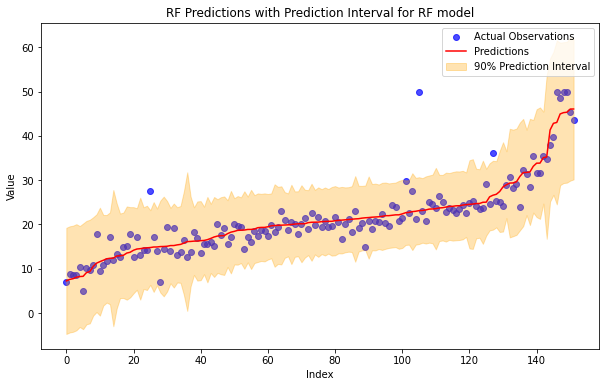

In [49]:
#Visualize the prediction interval for the Random forest
# Sort the data points based on the predictions for plotting purposes
sorted_indices1 = y_pred2.argsort()
#figure size
plt.figure(figsize=(10, 6))  
# Plot the actual observations
plt.scatter(range(len(y_test)), y_test.iloc[sorted_indices], label='Actual Observations', color='blue', alpha=0.7)

# Plot the predictions
plt.plot(range(len(y_test)), y_pred2[sorted_indices1], label='Predictions', color='red')

# Calculate the width of the prediction interval
prediction_interval_width1 = (rf_upper_band[sorted_indices1] - rf_lower_band[sorted_indices1]) / 2

# Plot the prediction interval as a shaded region
plt.fill_between(
    range(len(y_test)),
    y_pred2[sorted_indices1] - prediction_interval_width1,
    y_pred2[sorted_indices1] + prediction_interval_width1,
    color='orange',
    alpha=0.3,
    label='90% Prediction Interval'
)

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('RF Predictions with Prediction Interval for RF model')
plt.legend()

# Show the plot
plt.show()


In [50]:
# Make predictions on the test set

# Calculate prediction intervals
alpha = 0.95  # Confidence level
z = 1.96  # Z-score for 95% confidence

# Calculate standard deviation of residuals
residuals2 = y_test - y_pred2
std_residuals2 = np.std(residuals2)

# Calculate prediction intervals
prediction_intervals2 = z * std_residuals2


# Calculate Mean Prediction Interval Width (MPIW)
mean_interval_width2 = np.mean(prediction_interval_width1)

print(f"Mean Prediction Interval Width (MPIW): {mean_interval_width2:.4f}")


Mean Prediction Interval Width (MPIW): 9.4076
